<a href="https://colab.research.google.com/github/hr1588/NLP/blob/main/nlp_ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rickiepark/nlp-with-transformers.git
%cd nlp-with-transformers
from install import *
install_requirements(chapter=3)

Cloning into 'nlp-with-transformers'...
remote: Enumerating objects: 538, done.
remote: Counting objects: 100% (272/272), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 538 (delta 165), reused 184 (delta 107), pack-reused 266
Receiving objects: 100% (538/538), 46.22 MiB | 14.82 MiB/s, done.
Resolving deltas: 100% (264/264), done.
/content/nlp-with-transformers
⏳ Installing base requirements ...
✅ Base requirements installed!
Using transformers v4.26.0
Using datasets v2.9.0
Using accelerate v0.15.0
Using sentencepiece v0.1.97
Using bertviz


# 트랜스포머 아키텍처

In [5]:
!pip install wget -qqq

  Preparing metadata (setup.py) ... done


In [6]:
import wget
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import urllib.request

In [12]:
def url_to_image(url):
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype='uint8')
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)

  return cv2_imshow(image)

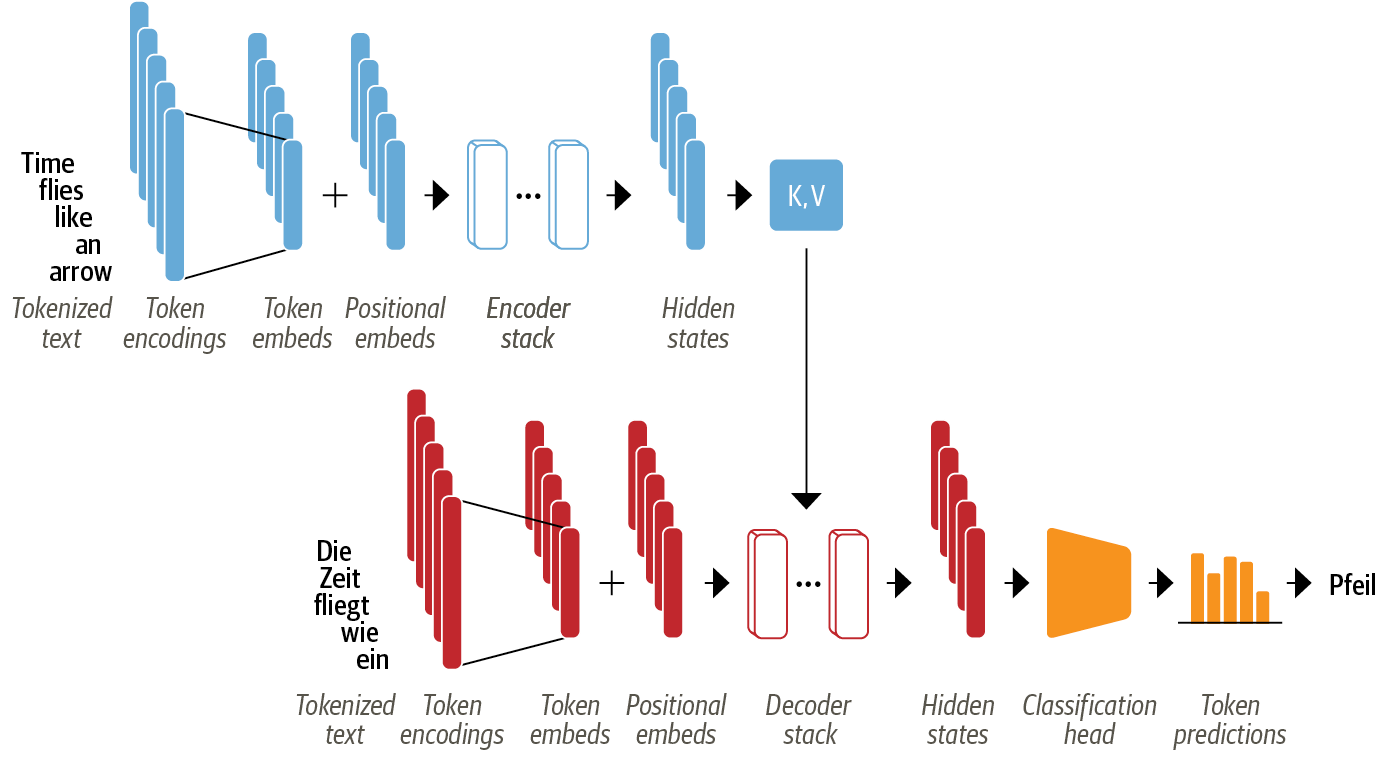

In [13]:
url_to_image('https://camo.githubusercontent.com/8be1f18babacd93cad15217ee58c9ff600e72e384309ac2539c99bc9be8c5883/68747470733a2f2f6769746875622e636f6d2f7269636b69657061726b2f6e6c702d776974682d7472616e73666f726d6572732f626c6f622f6d61696e2f696d616765732f6368617074657230335f7472616e73666f726d65722d656e636f6465722d6465636f6465722e706e673f7261773d31')

- 원본 트랜스포머는 인코더-디코더 구조를 기반으로 함, 해당 구조는 단어의 시퀀스를 다른 언어로 번역하는 기계 번역 같은 작업에 널리 사용
<br/>

- 인코더(encoder) : 입력 토큰의 시퀀스를 은닉 상태(hidden state) 또는 문맥(context)이라 부르는 임베딩 벡터의 시퀀스로 변환


- 워드 임베딩(Word Embedding) : 단어를 벡터로 표현하는 방법으로, 단어를 밀집 표현으로 변환


- 밀집 표현(dense representation) : 밀집 표현은 벡터의 차원을 단어 집합의 크기로 지정하지 않고, 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춤. 또한, 이 과정에서 더 이상 0과 1만 가진 값이 아니라 실수값을 가지게 됨
<br/>

- 디코더(decoder) : 인코더의 은닉 상태를 사용해 출력 토큰의 시퀀스를 한 번에 하나씩 반복적으로 생성

- 딥러닝에서의 시퀀스 모델링은 숨겨진 '상태 정보(은닉 상태)'를 유지하는 것과 관련이 있다. 시퀀스에 있는 각 항목이 은닉 상태를 업데이트 하고, 시퀀스 표현이라고 불리는 이 은닉상태의 벡터를 시퀀스 모델링 작업에 활용하는 과정


<br/>

## 트랜스포머 아키텍처의 특징
<br/>

- 입력 텍스트를 토큰화하고 토큰(token embedding)으로 변환

- attention 메커니즘은 토큰의 상대적인 위치를 모르기 때문에 텍스트의 순서 특징을 모델링하기 위해 각 토큰의 위치 정보가 담긴 위치 임베딩(positional embedding)을 토큰 임베딩과 결합

- 인코더가 인코더 층(encoder layer)의 스택 혹은 블록으로 구성되는데, 이는 디코더도 동일

- 디코더 층마다 인코더의 출력이 주입, 디코더는 시퀀스에서 가장 가능성 있는 다음 토큰을 예측. 해당 과정은 특수한 EOS(end-of-sequence) 토큰에 도달할 때까지 계속됨

<br/>

## 트랜스포머의 주요 유형
<br/>

### 1. 인코더 유형

- 인코더 유형은 텍스트 시퀀스 입력을 풍부한 수치 표현으로 변환, 해당 표현은 개체명 인식(Named Entity Recognition) 같은 작업에 적합

- BERT를 비롯해 RoBERTa나 2장에서 사용한 DistilBERT 같은 BERT의 변종이 이 유형에 속함

- 이런 아키텍처에서 한 토크네 대해 계산한 표현은 왼쪽(이전 토큰)과 오른쪽(이후 토큰)
문맥에 따라 달라지는데, 이를 종종 양방향 어텐션(bidirectional attention)이라고 함
<br/>

### 2. 디코더 유형

- 이 모델은 시작 텍스트가 주어지면 가장 가능성 있는 다음 단어를 반복해 예측하는 식으로 시퀀스를 자동 완성

- GPT 계열의 모델이 이 유형에 속하며, 이런 아키텍처에서 한 토큰에 대해 계산한 표현은 오직 왼쪽 문맥에 따라 달라지는데, 이를 종종 코잘 어텐션(cousal attention) 혹은 자기회귀 어텐션(autoregressive attention)이라고 함
<br/>

### 3. 인코더-디코더 유형

- 한 텍스트의 시퀀스를 다른 시퀀스로 매핑하는 복잡한 모델링에 사용하기 때문에 기계 번역과 요약에 적합

- 인코더와 디코더를 연결한 트랜스포머 아키텍처 외에 BART와 T5 모델이 이 유형에 속함

- BART(Bidirectional Auto-Regressive Transformer) : BERT와 GPT를 하나로 합친 형태로, 기존 sequence-to-sequence 트랜스포머 모델을 새로운 pre-training objective를 통해 학습하여 하나로 합친 모델

- T5(Text-to-Text Transfer Transformer) : Text-to-Text Transfer Transformer에서 T가 5번 나와서 명칭이 생긴 모델로, C4라는 레이블이 되지 않은 거대한 데이터셋으로 학습됨. T5 모델은 다양한 다운스트림 테스크에 맞게 조정이 될 수 있도록 설계되었으며, 텍스트와 텍스트(text-to-text) 형식으로 입력 및 출력을 진행

<br/>

# 인코더

--2023-01-25 13:37:20--  https://camo.githubusercontent.com/45e8d81dbb2892fcc951732511bf37b1be3627f46df6e42cf182a0653813ecf1/68747470733a2f2f6769746875622e636f6d2f7269636b69657061726b2f6e6c702d776974682d7472616e73666f726d6572732f626c6f622f6d61696e2f696d616765732f6368617074657230335f656e636f6465722d7a6f6f6d2e706e673f7261773d31
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51301 (50K) [image/png]
Saving to: ‘b.jpg’

b.jpg               100%[===================>]  50.10K  --.-KB/s    in 0.002s  

2023-01-25 13:37:20 (31.6 MB/s) - ‘b.jpg’ saved [51301/51301]



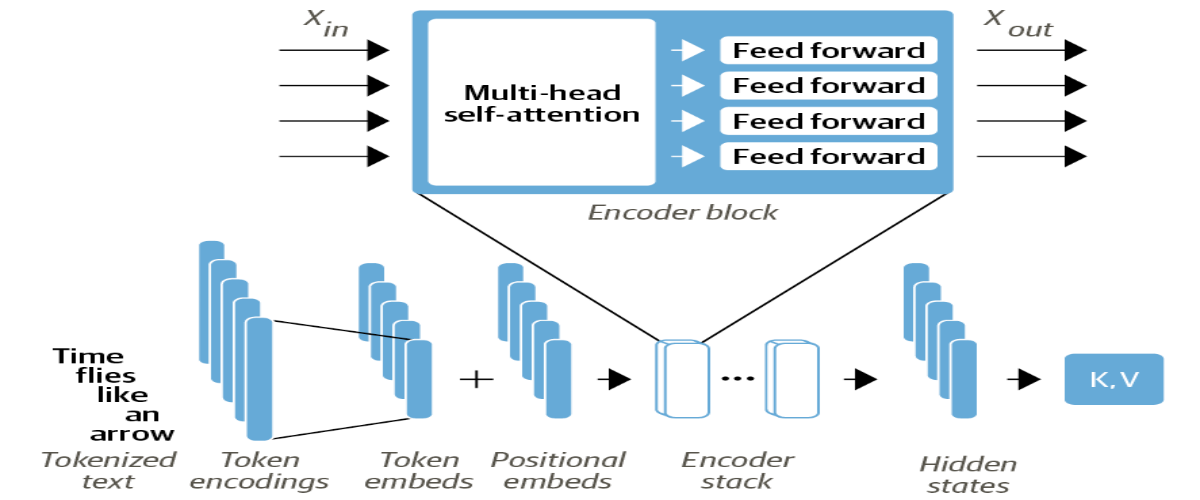

In [ ]:
!wget -O b.jpg https://camo.githubusercontent.com/45e8d81dbb2892fcc951732511bf37b1be3627f46df6e42cf182a0653813ecf1/68747470733a2f2f6769746875622e636f6d2f7269636b69657061726b2f6e6c702d776974682d7472616e73666f726d6572732f626c6f622f6d61696e2f696d616765732f6368617074657230335f656e636f6465722d7a6f6f6d2e706e673f7261773d31

img_path = "b.jpg"
img = cv2.imread(img_path)
img = cv2.resize(img,(1200,500))
cv2_imshow(img)


- 트랜스포머 인코더는 여러 개의 인코더 층이 서로 쌓여 구성, 각 인코더 층은 임베딩 시퀀스를 받아 멀티 헤드 셀프 어텐션 층(multi-head self-attention layer)과 각각의 입력 임베딩에 적용되는 완전 연결 피드 포워드 층(fully connected feed-forward layer)에 통과시킴

- 인코더 층의 출력 임베딩은 입력과 크기가 동일, 인코더 스택의 주요 역할은 입력 임베딩을 업데이트해 시퀀스의 문맥 정보가 인코딩된 표현을 만드는 것

- 멀티 헤드 어텐션 층과 피드 포워드 층은 심층 신경망을 효율적으로 훈련하기 위해 표준 기법인 스킵 연결(skip connection)과 층 정규화(layer normalization)도 사용

## 셀프 어텐션

--2023-01-25 13:19:20--  https://camo.githubusercontent.com/e141591c280d151f05ca465b1ede5e3d2d985ab1f7ed9168c27d166d2aed5131/68747470733a2f2f6769746875622e636f6d2f7269636b69657061726b2f6e6c702d776974682d7472616e73666f726d6572732f626c6f622f6d61696e2f696d616765732f6368617074657230335f636f6e7465787475616c697a65642d656d62656464696e672e706e673f7261773d31
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28046 (27K) [image/png]
Saving to: ‘c.jpg’

c.jpg               100%[===================>]  27.39K  --.-KB/s    in 0s      

2023-01-25 13:19:21 (76.0 MB/s) - ‘c.jpg’ saved [28046/28046]



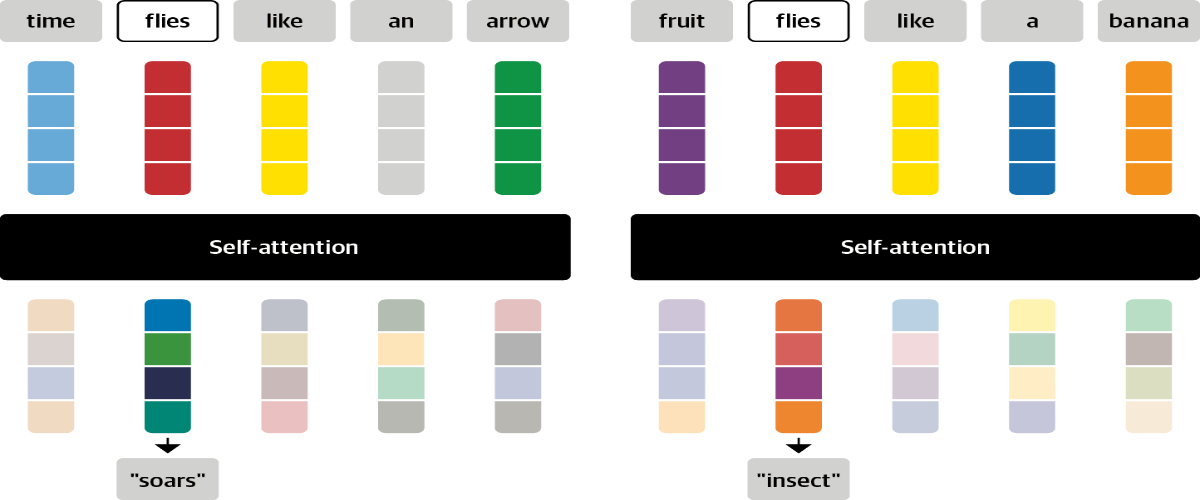

In [ ]:
!wget -O c.jpg https://camo.githubusercontent.com/e141591c280d151f05ca465b1ede5e3d2d985ab1f7ed9168c27d166d2aed5131/68747470733a2f2f6769746875622e636f6d2f7269636b69657061726b2f6e6c702d776974682d7472616e73666f726d6572732f626c6f622f6d61696e2f696d616765732f6368617074657230335f636f6e7465787475616c697a65642d656d62656464696e672e706e673f7261773d31

img_path = "c.jpg"
img = cv2.imread(img_path)
img = cv2.resize(img,(1200,500))
cv2_imshow(img)

- 어텐션 메커니즘을 사용하면 신경망이 시퀀스의 각 원소에 다른 양의 가중치 또는 '어텐션'을 할당

- 텍스트 시퀀스에서 원소는 토큰 임베딩을 사용, 각 토큰은 고정 차원의 벡터에 매핑

- 셀프 어텐션의 셀프는 이 가중치가 동일 집합에 있는 모든 은닉 상태에 대해 계산된다는 사실을 나타냄

- 순환 모델과 연관된 어텐션 메커니즘은 특정 디코딩 타임스텝에서 해당 디코더의 은닉 상태와 인코더의 각 은닉 상태가 가진 관련성을 계산

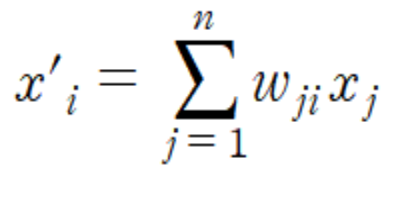

In [ ]:
img_path = "s.PNG"
img = cv2.imread(img_path)
img = cv2.resize(img,(400,200))
cv2_imshow(img)

- 각 토큰에 대해 고정된 임베딩을 사용하는 대신 전체 시퀀스를 사용해 각 임베딩의 가중 평균(weighted average)를 계산하는 것이 셀프 어텐션의 기본 개념

- 토큰 임베딩의 시퀀스 x1,..., xn이 주어지면 셀프 어텐션은 새로운 임베딩 시퀀스 x'1,...,x'n을 생성한다는 공식으로 표현, 여기서 x'i는 xj의 선형 결합(linear combination)

- 선형 결합 : 각 항에 상수를 곱하고 결과를 추가함으로써 일련의 항으로 구성된 표현식(예: x와 y의 선형 결합은 ax + by 형식인데 여기서 a와 b는 상수)

- 계수(coefficient) : wji는 어텐션 가중치(attention weight)라고 하며, 1이 되도록 정규화 됨
<br/>

- 토큰 임베딩의 평균을 구하는 이유 : 모든 토큰 임베딩을 비율을 달리해 통합하면 동일한 단어여도 문맥을 내포하는 표현이 만들어짐, 이때 문맥에 맞는 토큰 임베딩에 더 큰 가중치를 할당하는데, 이런 식으로 생성된 임베딩을 문맥 고려 임베딩(contextualized embedding)이라고 함

<br/>



## 스케일드 점곱 어텐션

--2023-01-25 13:19:21--  https://camo.githubusercontent.com/7494c0ed48277ba9300d3e37c6e5703a690d36545b6e6fe2f33a6c08a489ec6e/68747470733a2f2f6769746875622e636f6d2f7269636b69657061726b2f6e6c702d776974682d7472616e73666f726d6572732f626c6f622f6d61696e2f696d616765732f6368617074657230335f617474656e74696f6e2d6f70732e706e673f7261773d31
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16931 (17K) [image/png]
Saving to: ‘d.jpg’

d.jpg               100%[===================>]  16.53K  --.-KB/s    in 0s      

2023-01-25 13:19:21 (86.2 MB/s) - ‘d.jpg’ saved [16931/16931]



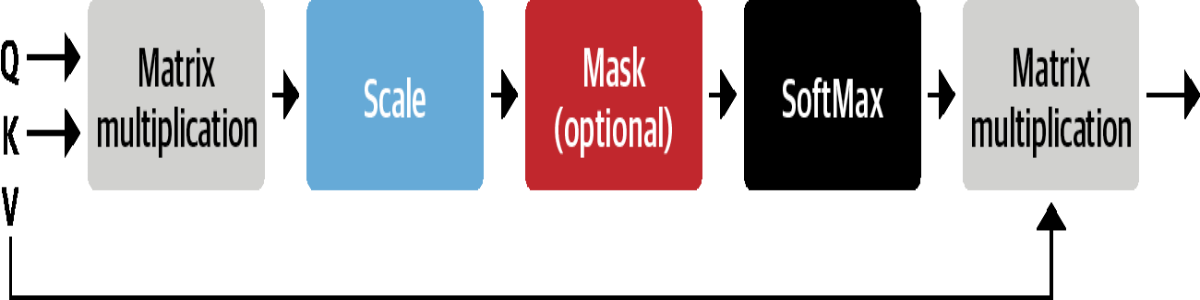

In [ ]:
!wget -O d.jpg https://camo.githubusercontent.com/7494c0ed48277ba9300d3e37c6e5703a690d36545b6e6fe2f33a6c08a489ec6e/68747470733a2f2f6769746875622e636f6d2f7269636b69657061726b2f6e6c702d776974682d7472616e73666f726d6572732f626c6f622f6d61696e2f696d616765732f6368617074657230335f617474656e74696f6e2d6f70732e706e673f7261773d31

img_path = "d.jpg"
img = cv2.imread(img_path)
img = cv2.resize(img,(1200,300))
cv2_imshow(img)

- 셀프 어텐션 층을 구현하는 여러가지 방법 중 스케일드 점곱 어텐션(scaled dot-product attention)이 가장 일반적인 방법

>1. 각 토큰 임베딩을 쿼리(query), 키(key), 값(value)의 세 개의 벡터로 투영

>>- query : decoder의 이전 layer hidden state, 영향을 받는 decoder의 token

>>- key : encoder의 output state, 영향을 주는 인코더의 tokens

>>- value : encoder의 output state, 그 영향에 대한 가중치가 곱해질 encoder tokens

>2. 유사도 함수(similarity function)을 사용해 쿼리 벡터와 키 벡터가 서로 얼마나 관련되어 있는지를 계산. 스케일드 점곱 어텐션의 유사도 함수는 점곱(dot product)이며, 쿼리와 키가 비슷하면 점곱 결과가 크고, 공통 부분이 많지 않으면 결과가 작음. 이 단계의 출력을 어텐션 점수(attention score)이라 하며 n개의 입력 토큰이 있는 시퀀스의 경우 크기가 n*n인 어텐션 점수 행렬이 만들어짐

>3. 일반적으로 점곱은 임의의 큰 수를 만들기 때문에 훈련 과정이 불안정해지는데, 이를 처리하기 위해 먼저 어텐션 점수에 스케일링 인자(scaling factor)를 곱해 분산을 정규화하고 softmax 함수를 적용해 모든 열의 합이 1이 되도록 함. 이 때 만들어진 n*n 행렬에 어텐션 가중치가 포함

>4. 토큰 임베딩을 업데이트, 어텐션 가중치가 계산되면 이를 값 벡터와 곱해서 임베딩을 위해 업데이트된 표현을 얻음


In [16]:
from transformers import AutoTokenizer
from bertviz.transformers_neuron_view import BertModel
from bertviz.neuron_view import show

# neuron_view : 쿼리와 키 벡터가 어떻게 결합되어 최종 가중치를 생산하는지를 가중치 계산 과정을 추적해 알려줌

In [17]:
model_ckpt = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = BertModel.from_pretrained(model_ckpt)
text = 'time flies like an arrow'
show(model, 'bert', tokenizer, text, display_mode = 'light', layer = 0, head = 8)

100%|██████████| 440473133/440473133 [00:11<00:00, 37154981.73B/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- 그림에서 수직 밴드는 query와 key 값을, 농도는 value의 크기를 나타냄

- 연결선은 토큰의 어텐션에 따라 가중되는데, flies에 대한 쿼리 벡터가 arrow 키 벡터와 가장 많이 중첩되어 있음을 확인

### pytorch와 keras의 클래스와 함수

- nn.Linear - keras.layers.Dense - 밀집층
- nn.Module - keras.layers.Layer - 모델 구성을 위한 기반 클래스
- nn.Dropout - keras.layers.Dropout - 드롭아웃 층
- nn.LayerNorm - keras.layers.LayerNormalization - 층 정규화
- nn.Embedding - keras.layers.Embedding - 입베딩 층
- nn.GELU - keras.activation.gelu - GELU 활성화 함수
- nn.bmm - tf.matmul - 배치 행렬곱셈
- model.forword - model.call - 모델의 정방향 패스

### 텍스트 토큰화

In [18]:
inputs = tokenizer(text, return_tensors = 'pt', add_special_tokens = False)
inputs.input_ids

tensor([[ 2051, 10029,  2066,  2019,  8612]])

In [19]:
inputs

{'input_ids': tensor([[ 2051, 10029,  2066,  2019,  8612]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1]])}

### 밀집 임베딩 제작

In [22]:
from torch import nn
from transformers import AutoConfig # config.json 파일 로드

config = AutoConfig.from_pretrained(model_ckpt)
token_emb = nn.Embedding(config.vocab_size, config.hidden_size)
token_emb

Embedding(30522, 768)

- 밀집(dense) : 임베딩에 있는 모든 원소의 값이 0이 아니라는 의미

- Word Embedding : 자연어 처리에서 특징 추출을 통해 수치화를 해줘야 하는데, 이때 사용하는 것이 "언어의 벡터화"이고, 이러한 벡터화의 과정을 word embedding이라고 함

- 기본적인 방법은 one-hot encoding(희소), 하지만 이 방법은 비효율적이라 단어의 수에 상관없이 특정 차원의 벡터로 변환시켜 단어의 특성이나 유사성을 나타내는데, 이것이 dense(밀집)한 표현법

- 즉, 해당 예제는 입력 ID가 nn.embedding에 저장된 30,522개의 임베딩 벡터 중 하나에 매핑되고, 각 벡터의 크기는 768
<br/>

- 이 시점에서 토큰 임베딩은 문맥과 독립적이기 때문에, 동음이의어의 표현이 동일함. 따라서 이러한 토큰 임베딩을 혼합해 의미를 명확하게 하고 토큰 표현에 문맥 내용을 주입해야 함

In [23]:
inputs_embeds = token_emb(inputs.input_ids)
inputs_embeds

tensor([[[ 1.4348e-01, -1.8346e+00, -1.3178e+00,  ...,  9.3776e-02,
          -2.7740e-01, -8.3458e-01],
         [-5.5008e-01,  7.1122e-01, -5.3578e-01,  ..., -2.9016e-01,
          -6.5301e-01, -1.5414e+00],
         [ 8.0409e-02,  1.6695e-01, -1.7029e+00,  ..., -3.3005e-01,
           1.4337e+00,  8.6816e-01],
         [ 1.1599e+00,  9.0612e-01, -1.2416e-03,  ...,  1.5848e+00,
          -2.0233e-01, -1.1132e-01],
         [-1.6826e+00, -3.6601e-01, -1.9660e-01,  ..., -3.3594e-01,
          -2.2131e-01,  8.4654e-01]]], grad_fn=<EmbeddingBackward0>)

In [24]:
inputs_embeds.size() # batch size, seq_len, hidden_dim

torch.Size([1, 5, 768])

### 어텐션 점수 계산

In [25]:
import torch
from math import sqrt

query = key = value = inputs_embeds

dim_k = key.size(-1) # key의 last dim
scores = torch.bmm(query, key.transpose(1,2)) / sqrt(dim_k) 
# bmm : 행렬 곱, transpose : 차원 변경, sqrt : 제곱근 계산
scores.size()

torch.Size([1, 5, 5])

In [26]:
dim_k

768

In [27]:
scores

tensor([[[31.1136, -0.9473, -0.4497, -0.8957, -1.2162],
         [-0.9473, 26.0637,  1.2277,  0.6295,  0.4759],
         [-0.4497,  1.2277, 27.3212,  0.5162, -0.2962],
         [-0.8957,  0.6295,  0.5162, 29.4768, -1.4788],
         [-1.2162,  0.4759, -0.2962, -1.4788, 27.1035]]],
       grad_fn=<DivBackward0>)

- 배치에 있는 sample마다 5*5 크기의 어텐션 점수 행렬이 제작

- 책에서는 간단하게 진행하기 위해 k,q,v의 값을 동일하게 설정

- 점곱은 임베딩 벡터의 크기로 스케일을 조정, 이 과정을 통해 훈련 도주 큰 수의 빈번한 발생을 줄여 다음에 이어질 softmax의 포화를 방지


In [ ]:
import torch.nn.functional as F

weights = F.softmax(scores, dim = -1)
weights.sum(dim=-1)

tensor([[1., 1., 1., 1., 1.]], grad_fn=<SumBackward1>)

In [ ]:
attn_outputs = torch.bmm(weights, value)
attn_outputs.shape

torch.Size([1, 5, 768])

In [ ]:
attn_outputs

tensor([[[-2.1453, -1.9079, -1.9579,  ..., -1.8796,  1.7083,  0.2294],
         [ 1.3971,  1.4712, -0.2261,  ..., -1.4040, -0.7837,  1.4122],
         [-0.6232, -0.9500,  1.8109,  ..., -0.5590, -0.6480,  1.7238],
         [ 1.6728, -0.0853,  1.1401,  ..., -0.4399, -0.7082, -0.6998],
         [-0.2606, -2.4091, -0.1974,  ..., -0.6980, -1.9987, -0.6943]]],
       grad_fn=<BmmBackward0>)

In [ ]:
def scaled_dot_product_attention(query, key, value):
    dim_k = query.size(-1)
    scores = torch.bmm(query, key.transpose(1,2)) / sqrt(dim_k)
    weights = F.softmax(scores, dim = -1)
    return torch.bmm(weights, value)

# 스케일드 점곱 어텐션을 수행하는 def 함수 제작

## 멀티 헤드 어텐션

--2023-01-25 13:19:30--  https://camo.githubusercontent.com/0fa9c93fc1e2faf9deee20eddb931aebb3cddea3b3f5308920e05ed19106bd84/68747470733a2f2f6769746875622e636f6d2f7269636b69657061726b2f6e6c702d776974682d7472616e73666f726d6572732f626c6f622f6d61696e2f696d616765732f6368617074657230335f6d756c7469686561642d617474656e74696f6e2e706e673f7261773d31
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21598 (21K) [image/png]
Saving to: ‘e.jpg’

e.jpg               100%[===================>]  21.09K  --.-KB/s    in 0.003s  

2023-01-25 13:19:31 (5.91 MB/s) - ‘e.jpg’ saved [21598/21598]



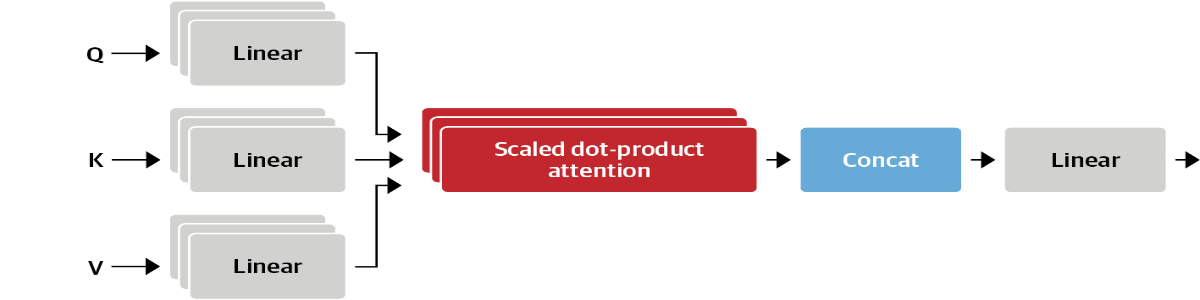

In [ ]:
!wget -O e.jpg https://camo.githubusercontent.com/0fa9c93fc1e2faf9deee20eddb931aebb3cddea3b3f5308920e05ed19106bd84/68747470733a2f2f6769746875622e636f6d2f7269636b69657061726b2f6e6c702d776974682d7472616e73666f726d6572732f626c6f622f6d61696e2f696d616765732f6368617074657230335f6d756c7469686561642d617474656e74696f6e2e706e673f7261773d31

img_path = "e.jpg"
img = cv2.imread(img_path)
img = cv2.resize(img,(1200,300))
cv2_imshow(img)

- 셀프 어텐션 층은 각 임베딩에 독립적인 선형 변환 3개를 적용해 q,k,v 벡터를 생성. 이러한 변환은 임베딩을 투영하며 각 투영은 학습 가능한 파라미터를 가짐

- 어텐션 헤드(attention head) : 여러 번의 선형 투영에서 각 투영의 집합

- 하나의 헤드의 softmax가 유사도의 한 측면에만 초점을 맞추는 경향이 있기 때문에, 여러 개 헤드가 있으면 모델은 동시에 여러 측면에 초점을 맞춤

> ex) 한 헤드는 주어 - 동사, 다른 헤드는 인접한 형용사를 탐색


In [ ]:
class attentionhead(nn.Module):
    def __init__(self, embed_dim, head_dim):
        super().__init__()
        self.q = nn.Linear(embed_dim, head_dim)
        self.k = nn.Linear(embed_dim, head_dim)
        self.v = nn.Linear(embed_dim, head_dim)
    
    def forward(self, hidden_state):
        attn_outputs = scaled_dot_product_attention(
            self.q(hidden_state),self.k(hidden_state),self.v(hidden_state))
        return attn_outputs

- 3개의 독립된 선형 층을 만들어, 임베딩 벡터에 행렬 곱을 적용해 [batch_size, seq_len, head_dim] 크기의 텐서를 제작

- head_dim : 투영하려는 차원의 크기로, 임베딩 차원(embed_dim)보다 작을 필요는 없지만, 실전에서는 일정한 계산을 위해 embed_dim과 배수가 되도록 선택

> ex) bert에는 head가 12개 있으므로 각 헤드의 차원은 768/12 = 64



In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, config):
        super().__init__()
        embed_dim = config.hidden_size
        num_heads = config.num_attention_heads
        head_dim = embed_dim // num_heads
        self.heads = nn.ModuleList(
            [attentionhead(embed_dim, head_dim) for _ in range(num_heads)]
        )
        self.output_linear = nn.Linear(embed_dim, embed_dim)

    def forward(self, hidden_state):
        x = torch.cat([h(hidden_state) for h in self.heads], dim = -1) # cat : 주어진 차원을 기준으로 주어진 텐서들을 concatenate
        x = self.output_linear(x)
        return x

- 어텐션 헤드의 출력을 연결한 다음 최종 선형 층으로 주입해서 [batch_size, seq_len, head_dim] 크기의 출력 텐서 제작, 해당 형태는 뒤따르는 피드 포워드 신경망에 사용하기 적절함

In [ ]:
multihead_attn = MultiHeadAttention(config)
attn_output = multihead_attn(inputs_embeds)
attn_output.size()

torch.Size([1, 5, 768])

In [ ]:
multihead_attn

MultiHeadAttention(
  (heads): ModuleList(
    (0): attentionhead(
      (q): Linear(in_features=768, out_features=64, bias=True)
      (k): Linear(in_features=768, out_features=64, bias=True)
      (v): Linear(in_features=768, out_features=64, bias=True)
    )
    (1): attentionhead(
      (q): Linear(in_features=768, out_features=64, bias=True)
      (k): Linear(in_features=768, out_features=64, bias=True)
      (v): Linear(in_features=768, out_features=64, bias=True)
    )
    (2): attentionhead(
      (q): Linear(in_features=768, out_features=64, bias=True)
      (k): Linear(in_features=768, out_features=64, bias=True)
      (v): Linear(in_features=768, out_features=64, bias=True)
    )
    (3): attentionhead(
      (q): Linear(in_features=768, out_features=64, bias=True)
      (k): Linear(in_features=768, out_features=64, bias=True)
      (v): Linear(in_features=768, out_features=64, bias=True)
    )
    (4): attentionhead(
      (q): Linear(in_features=768, out_features=64, bias=

In [ ]:
from bertviz import head_view
from transformers import AutoModel

model = AutoModel.from_pretrained(model_ckpt, output_attentions = True)

s_a = "time flies like an arrow"
s_b = "fruit flies like a banana"

viz_inputs = tokenizer(s_a, s_b, return_tensors = 'pt')
attention = model(**viz_inputs).attentions
s_b_start = (viz_inputs.token_type_ids == 0).sum(dim = 1)
tokens = tokenizer.convert_ids_to_tokens(viz_inputs.input_ids[0])

head_view(attention, tokens, s_b_start, heads = [8])

<IPython.core.display.Javascript object>

- 어텐선 가중치는 임베딩이 업데이트된 토큰(왼쪽)과 주의를 기울인 모든 단어(오른쪽)을 연결한 직선으로 표시, 직선의 농도는 가중치의 강도를 나타내고 짙은 색은 1에 가까운 값, 흐린 색은 0에 가까운 값으로 표시

- 어텐션 가중치를 사용해 동일한 단어(flies)라도 문맥에 따라 구분이 가능함을 보여줌

<br/>

- 즉, 어텐션은 기존 seq2seq 모델 구조에서 현재 시점의 디코더 토큰을 입력해서 다음 디코더 토큰을 예측 할 때 현재 시점 디코더 토큰과 인코더 토큰들간의 유사도를 내적을 통해 구한 뒤 해당 계산값을 반영하여 다음 디코더 토큰의 예측 성능을 높이는 것

> ex) "I am hungry"를 "나는 배가 고프다"로 번역할 때, 내적을 통해 고프다는 hungry와 유사도가 0.8, am과 0.2, I와 0.1이 구해졌고 이 값들을 다 더해 다음 토큰 예측에 반영

> - 이를 통해 현시점의 디코더가 어떤 인코더 토큰과 가장 유사한지에 대한 정보가 반영

<br/>

- Transformer는 이러한 attention 학습 방법을 가져오는데 이때 기존의 구조와 다른점은 RNN 계열을 인코더 디코더로 구성하지 않고, attention으로 학습을 진행하며 attention의 query, key, value에 여러개의 가중치 행렬(weight matrix)를 넣어 학습이 되게 하는 multi-head attention 방법을 활용

- 이러한 multi-head attention으로 인코더, 디코더 구조가 된게 바로 transformer

In [ ]:
attention[0].size()

torch.Size([1, 12, 13, 13])

In [ ]:
attention[0]

tensor([[[[5.0308e-02, 4.8489e-02, 3.3783e-02,  ..., 1.0662e-01,
           3.4201e-02, 1.5616e-01],
          [2.3186e-01, 5.4006e-02, 1.9014e-01,  ..., 1.2277e-03,
           6.9611e-03, 5.2383e-03],
          [3.9468e-02, 1.4838e-01, 2.1820e-01,  ..., 2.4379e-03,
           1.2240e-02, 4.4097e-03],
          ...,
          [8.4569e-02, 2.6371e-03, 4.6116e-03,  ..., 8.3565e-02,
           2.1223e-01, 1.5234e-01],
          [6.7516e-02, 1.4132e-03, 3.4118e-03,  ..., 3.7773e-02,
           2.0925e-01, 2.3536e-01],
          [5.3773e-02, 1.2619e-03, 1.4584e-03,  ..., 1.5566e-01,
           1.3315e-01, 3.4202e-01]],

         [[8.5989e-01, 1.3223e-02, 4.4054e-03,  ..., 1.9977e-02,
           5.8908e-03, 9.8486e-03],
          [5.3689e-03, 5.8076e-02, 3.4999e-01,  ..., 3.4334e-03,
           4.7788e-02, 1.2578e-02],
          [7.3117e-02, 1.1438e-01, 9.3617e-02,  ..., 3.7564e-03,
           2.1223e-02, 2.4680e-02],
          ...,
          [1.5048e-02, 1.2647e-02, 2.3887e-02,  ..., 7.8820

In [ ]:
s_b_start

tensor([7])

## 피드 포워드 층

In [ ]:
class feedforward(nn.Module):
    def __init__(self, config):
        super().__init__() # 다른 클래스의 속성 및 메소드를 자동으로 불러와 해당 클래스에서 사용가능하게 함
        self.linear_1 = nn.Linear(config.hidden_size, config.intermediate_size) # Encoder의 intermediate(=feed-forward) 차원 수, default = 3072
        self.linear_2 = nn.Linear(config.intermediate_size, config.hidden_size)
        self.gelu = nn.GELU()
        self.dropout = nn.Dropout(config.hidden_dropout_prob)

    def forward(self,x):
        x = self.linear_1(x)
        x = self.gelu(x)
        x = self.linear_2(x)
        x = self.dropout(x)
        return x

In [ ]:
feed_forward = feedforward(config)
ff_outputs = feed_forward(attn_outputs)
ff_outputs.size()

torch.Size([1, 5, 768])

In [ ]:
feed_forward

feedforward(
  (linear_1): Linear(in_features=768, out_features=3072, bias=True)
  (linear_2): Linear(in_features=3072, out_features=768, bias=True)
  (gelu): GELU(approximate='none')
  (dropout): Dropout(p=0.1, inplace=False)
)

In [ ]:
ff_outputs

tensor([[[ 0.0198,  0.0809,  0.0226,  ..., -0.0133, -0.0639,  0.4151],
         [ 0.0000,  0.0583,  0.2883,  ...,  0.4040, -0.2156,  0.1284],
         [-0.0692, -0.0284, -0.0000,  ...,  0.1186, -0.0462, -0.1464],
         [-0.1019,  0.6620, -0.5024,  ...,  0.0350,  0.0609, -0.1328],
         [ 0.1265,  0.0370, -0.0747,  ...,  0.3791,  0.2082, -0.0000]]],
       grad_fn=<MulBackward0>)

- 인코더와 디코더에 있는 피드 포워드 층은 간단한 2개 층으로 구성된 완전 연결 신경망

- 하지만, 전체 임베딩 시퀀스를 하나의 벡터로 처리하지 않고 각 임베딩을 독립적으로 처리, 이러한 이유로 이 층을 위치별 피드 포워드 층(position-wise feed forward layer)이라고도 함

- nn.Linear과 같은 피드 포워드 층은 일반적으로 (batch_size, input_dim) 크기의 텐서에 적용되며 배치 차원의 각 원소에 독립적으로 동작

- (batch_size, seq_len, hidden_dim) 크기의 텐서를 전달하면 배치와 시퀀스의 모든 토큰 임베딩에 피드 포워드 층이 독립적으로 적용
<br/>

### GLUE 함수
-  dropout, zoneout, ReLU 함수의 특성을 조합
- ReLU : 입력 x의 부호에 따라 1이나 0을 deterministic(결정론적)하게 곱함.
- dropout : 1이나 0을 stochastic(확률적) 하게 곱함
-  https://hongl.tistory.com/236



## 층 정규화

--2023-01-25 13:37:35--  https://camo.githubusercontent.com/ec18f3614bd69b0b07f0f6a61e524f7f5dbe39bfc8936148f8d47cc56a5c5bfc/68747470733a2f2f6769746875622e636f6d2f7269636b69657061726b2f6e6c702d776974682d7472616e73666f726d6572732f626c6f622f6d61696e2f696d616765732f6368617074657230335f6c617965722d6e6f726d2e706e673f7261773d31
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37799 (37K) [image/png]
Saving to: ‘g.jpg’

g.jpg               100%[===================>]  36.91K  --.-KB/s    in 0s      

2023-01-25 13:37:35 (82.7 MB/s) - ‘g.jpg’ saved [37799/37799]



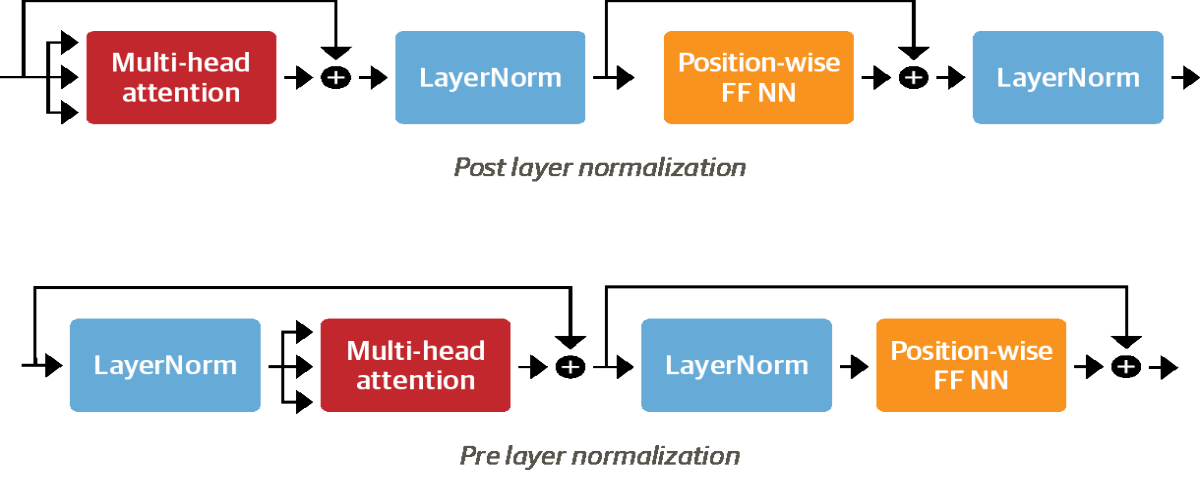

In [ ]:
!wget -O g.jpg https://camo.githubusercontent.com/ec18f3614bd69b0b07f0f6a61e524f7f5dbe39bfc8936148f8d47cc56a5c5bfc/68747470733a2f2f6769746875622e636f6d2f7269636b69657061726b2f6e6c702d776974682d7472616e73666f726d6572732f626c6f622f6d61696e2f696d616765732f6368617074657230335f6c617965722d6e6f726d2e706e673f7261773d31

img_path = "g.jpg"
img = cv2.imread(img_path)
img = cv2.resize(img,(1200,500))
cv2_imshow(img)

사후 층 정규화
> - 스킵 연결 사이에 층 정규화
> - 그레이디언트가 발산하는 경우 처음부터 훈련하기가 까다로움 <br/> => 훈련하는 동안 학습률을 작은 값에서 최댓값까지 점진적으로 증가시키는 학습률 웝업(learning rate warm-up) 사용

사전 층 정규화
> - 스킵 연결 안에 층 정규화
> - 안정적으로 훈련되는 경향이 학습률 웜업이 필요하지 않음

스킵 연결(skip connection) : 신경망 모델에서 이전 층의 정보를 이용하기 위해 이전 층의 정보를 연결하는 방법

In [ ]:
class TransformerEncoderLayer(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.layer_norm_1 = nn.LayerNorm(config.hidden_size)
        self.layer_norm_2 = nn.LayerNorm(config.hidden_size)
        self.attention = MultiHeadAttention(config)
        self.feed_forward = feedforward(config)

    def forward(self, x):
        # 층 정규화를 적용하고 입력을 쿼리, 키, 값으로 복사
        hidden_state = self.layer_norm_1(x)
        # 어텐션에 스킵 연결 적용
        x = x + self.attention(hidden_state)
        # 스킵 연결과 피드 포워드 층 적용
        x = x + self.feed_forward(self.layer_norm_2(x))
        return x


In [ ]:
encoder_layer = TransformerEncoderLayer(config)
inputs_embeds.shape, encoder_layer(inputs_embeds).size()

(torch.Size([1, 5, 768]), torch.Size([1, 5, 768]))

In [ ]:
encoder_layer

TransformerEncoderLayer(
  (layer_norm_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (layer_norm_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (attention): MultiHeadAttention(
    (heads): ModuleList(
      (0): attentionhead(
        (q): Linear(in_features=768, out_features=64, bias=True)
        (k): Linear(in_features=768, out_features=64, bias=True)
        (v): Linear(in_features=768, out_features=64, bias=True)
      )
      (1): attentionhead(
        (q): Linear(in_features=768, out_features=64, bias=True)
        (k): Linear(in_features=768, out_features=64, bias=True)
        (v): Linear(in_features=768, out_features=64, bias=True)
      )
      (2): attentionhead(
        (q): Linear(in_features=768, out_features=64, bias=True)
        (k): Linear(in_features=768, out_features=64, bias=True)
        (v): Linear(in_features=768, out_features=64, bias=True)
      )
      (3): attentionhead(
        (q): Linear(in_features=768, out_features=64, bias

In [ ]:
inputs_embeds

tensor([[[-2.1453, -1.9079, -1.9579,  ..., -1.8796,  1.7083,  0.2294],
         [ 1.3971,  1.4712, -0.2261,  ..., -1.4040, -0.7837,  1.4122],
         [-0.6232, -0.9500,  1.8109,  ..., -0.5590, -0.6480,  1.7238],
         [ 1.6728, -0.0853,  1.1401,  ..., -0.4399, -0.7082, -0.6998],
         [-0.2606, -2.4091, -0.1974,  ..., -0.6980, -1.9987, -0.6943]]],
       grad_fn=<EmbeddingBackward0>)

In [ ]:
encoder_layer(inputs_embeds)

tensor([[[-1.9711, -1.9004, -1.9871,  ..., -2.6908,  1.1306,  0.5283],
         [ 1.5365,  1.4803, -0.2240,  ..., -1.6866, -0.9266,  1.7079],
         [-0.5839, -0.7274,  1.4365,  ..., -0.9735, -0.8500,  2.4207],
         [ 1.8774, -0.2214,  1.2901,  ..., -0.3795, -1.0834, -0.2596],
         [-0.1905, -2.4559, -0.2254,  ..., -1.0591, -2.0187, -0.6762]]],
       grad_fn=<AddBackward0>)

- 트랜스포머 인코더 층을 구현해냈지만, 멀티 헤드 어텐션 층은 가중 합(weighted sum)이기 때문에 토큰 위치에 대한 정보가 사라짐

- 위치 임베딩을 사용해 위치 정보를 통합해야 함

## 위치 임베딩

- 벡터에 나열된 값의 위치 패턴으로 토큰 임베딩 보강

- 학습 가능한 패턴을 사용하는 방법 , 사전 훈련 데이터 셋이 충분히 큰 경우 좋음

- input_ids를 밀집 은닉 상태에 투영하는 토큰 임베딩 층과 position_ids에 동일한 작업을 수행하는 위치 임베딩을 통합

In [ ]:
class Embeddings(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.token_embeddings = nn.Embedding(config.vocab_size, config.hidden_size)
        self.position_embeddings = nn.Embedding(config.max_position_embeddings,
                                                config.hidden_size)
        self.layer_norm = nn.LayerNorm(config.hidden_size, eps = 1e-12) # eps : 수치적 안정성을 위해 분모에 추가되는 값
        self.dropout = nn.Dropout()

    def forward(self, input_ids):
       # 입력 시퀀스에 대해 위치 ID 제작
       seq_length = input_ids.size(1)
       position_ids = torch.arange(seq_length, dtype = torch.long).unsqueeze(0)
       
       # 토큰 임베딩과 위치 임베딩 제작
       token_embeddings = self.token_embeddings(input_ids)
       position_embeddings = self.position_embeddings(position_ids)
       
       # 토큰 임베딩과 위치 임베딩 결합
       embeddings = token_embeddings + position_embeddings
       embeddings = self.layer_norm(embeddings)
       embeddings = self.dropout(embeddings)
       
       return embeddings

embedding_layer = Embeddings(config)
embedding_layer(inputs.input_ids).size()

torch.Size([1, 5, 768])

In [ ]:
embedding_layer

Embeddings(
  (token_embeddings): Embedding(30522, 768)
  (position_embeddings): Embedding(512, 768)
  (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [ ]:
embedding_layer(inputs.input_ids)

tensor([[[-0.5653,  2.6903,  1.5838,  ...,  2.8180,  1.7598,  0.0000],
         [-0.0000,  0.0000,  0.0000,  ...,  2.6382,  2.9674, -1.4403],
         [-0.0000, -0.0356, -4.2580,  ...,  0.0000, -0.3736, -0.0000],
         [-0.0000, -1.7133,  1.5632,  ..., -0.0000, -0.0000,  0.0000],
         [-1.3066,  4.7401, -1.3159,  ...,  0.0000, -0.0000,  0.0000]]],
       grad_fn=<MulBackward0>)

- 임베딩 층이 토큰마다 하나의 밀집 임베딩을 제작

* 절대 위치 표현 : 트랜스포머 모델은 변조된 sin 및 cos 신호로 구성된 정적 패턴을 사용해 토큰 위치를 인코딩, 가용한 데이터가 많지 않을 때 특히 잘 동작함

* 상대 위치 표현 : 임베딩을 계산할 때 주위 토큰을 더 중요하게 여길 수도 있음, 상대 위치 표현은 이런 직관을 따라 토큰의 상대 위치를 인코딩

In [ ]:
class TransformerEncoder(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.embeddings = Embeddings(config)
        self.layers = nn.ModuleList([TransformerEncoder(config) for _ in range(config.num_hidden_layers)])

    def forward(self,x):
        x = self.embeddings(x)
        for layer in self.layers:
            x = layer(x)
        return x

In [ ]:
encoder = TransformerEncoder(config)
encoder(inputs.input_ids).size() # 세션 다운

In [ ]:
encoder(inputs.input_ids) # 세션 다운

## 분류 헤드 추가

In [ ]:
class TransformerForSequenceClassification(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.encoder = TransformerEncoder(config)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)

    def forward(self,x):
        x = self.encoder(x)[:,0,:] # CLS 토큰의 은닉상태 선택
        x = self.dropout(x)
        x = self.classifier(x)
        return x

In [ ]:
config.num_labels = 3
encoder_classifier = TransformerForSequenceClassification(config)
encoder_classifier(inputs.input_ids).size()

- 텍스트 분류 모델을 만들기 위해서는 바디(지금까지 만든 것)에 분류 헤드를 추가해야 함

- 보통 모델의 첫 번째 토큰을 예측에 사용하고 드롭아웃과 선형 층을 추가해 분류 예측을 만듦

- 배치에 있는 각 샘플에 대해 출력 클래스마다 정규화되지 않은 로짓이 반환

# 디코더

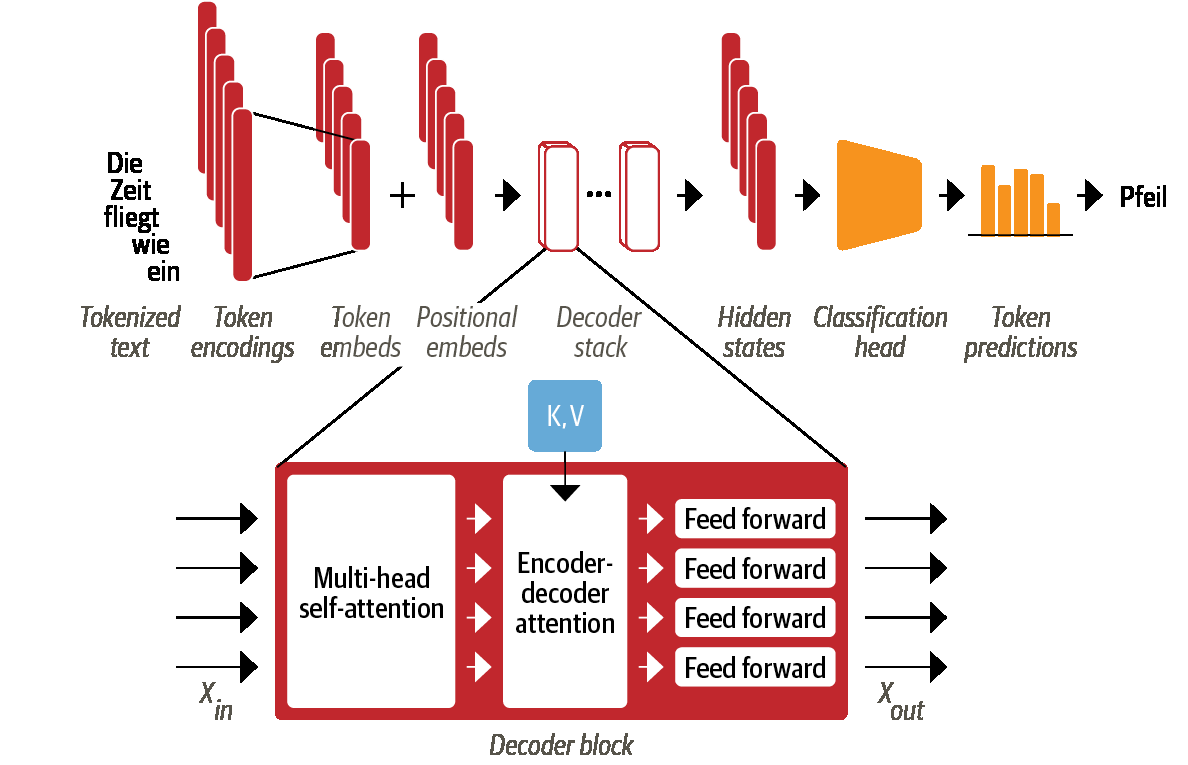

In [14]:
url_to_image('https://camo.githubusercontent.com/2cc8d49fb4ff0df4b991c77e897cfd061e62ffd129a40a332312f8af51731c21/68747470733a2f2f6769746875622e636f6d2f7269636b69657061726b2f6e6c702d776974682d7472616e73666f726d6572732f626c6f622f6d61696e2f696d616765732f6368617074657230335f6465636f6465722d7a6f6f6d2e706e673f7261773d31')

In [30]:
import torch
import torch.nn.functional as F

seq_len = inputs.input_ids.size(-1)
mask = torch.tril(torch.ones(seq_len, seq_len)).unsqueeze(0)
mask

tensor([[[1., 0., 0., 0., 0.],
         [1., 1., 0., 0., 0.],
         [1., 1., 1., 0., 0.],
         [1., 1., 1., 1., 0.],
         [1., 1., 1., 1., 1.]]])

- tril 함수를 사용해 하삼각행렬 제작
- 하삼각행렬(lower triangular matrix) : 주대각선을 기준으로 대각항의 위쪽이나 아래쪽 항들의 값이 모두 0인 경우를 의미



In [32]:
scores

tensor([[[31.1136, -0.9473, -0.4497, -0.8957, -1.2162],
         [-0.9473, 26.0637,  1.2277,  0.6295,  0.4759],
         [-0.4497,  1.2277, 27.3212,  0.5162, -0.2962],
         [-0.8957,  0.6295,  0.5162, 29.4768, -1.4788],
         [-1.2162,  0.4759, -0.2962, -1.4788, 27.1035]]],
       grad_fn=<DivBackward0>)

In [28]:
scores.masked_fill(mask == 0, -float('inf'))

tensor([[[31.1136,    -inf,    -inf,    -inf,    -inf],
         [-0.9473, 26.0637,    -inf,    -inf,    -inf],
         [-0.4497,  1.2277, 27.3212,    -inf,    -inf],
         [-0.8957,  0.6295,  0.5162, 29.4768,    -inf],
         [-1.2162,  0.4759, -0.2962, -1.4788, 27.1035]]],
       grad_fn=<MaskedFillBackward0>)

- 0을 음의 무한대로 바꿔서 어텐션 헤드가 미래 토큰을 엿보지 못하게 함

In [31]:
def scaled_dot_product_attention(query, key, value, attetnion):
    dim_k = query.size(-1)
    scores = torch.bmm(query, key.transpose(1,2)) / sqrt(dim_k)
    if mask is not None:
        scores = scores.masked_fill(mask == 0, float('inf'))
    weights = F.softmax(dim = -1)
    return weights.bmm(value)

https://github.com/karpathy/minGPT/tree/master/mingpt